<a href="https://colab.research.google.com/github/harshiitk1109/Demystifying-ML/blob/main/Copy_of_Demystifying_MLAlgorithms_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1                     
Fit y = sin(x)
using yn = β0 + β1x + β2x^2 + β3x^3

Find the weights using Mean Square Loss Function and only the given libraries and Gradient Descent optimization (iterations = 100000, learning rate = 0.001)

Plot y and yn with respect to x (use scatter plot: plt.scatter())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
x=np.random.uniform(-math.pi/2,math.pi/2,10)
print(x)
y=np.zeros(np.size(x))
for i in range(np.size(y)):
  y[i]=math.sin(x[i])
print(y)

[-0.00607281  0.31829316  1.49831965  1.10071395 -0.55566809 -0.5751759
 -1.49398193 -0.80497187 -0.07856119  0.03481659]
[-0.00607277  0.31294591  0.99737472  0.89153098 -0.52751099 -0.5439824
 -0.99705122 -0.72081115 -0.0784804   0.03480955]


[-0.37335911  1.21264487  0.79328964  1.04812928 -0.52982365 -0.82444593
 -1.19803644 -1.56439293 -0.82572153 -1.50809543]
[-0.36474518  0.93654642  0.71266482  0.86649089 -0.50538118 -0.7341717
 -0.93132578 -0.9999795  -0.73503719 -0.99803494]
Iteration = 0, Loss = 5.0087838158292435
Iteration = 1000, Loss = 0.3017562899930211
Iteration = 2000, Loss = 0.118328148818196
Iteration = 3000, Loss = 0.08197229434319503
Iteration = 4000, Loss = 0.06339905408352606
Iteration = 5000, Loss = 0.05159411969690875
Iteration = 6000, Loss = 0.04364319574849149
Iteration = 7000, Loss = 0.03802160081431531
Iteration = 8000, Loss = 0.033837457478860335
Iteration = 9000, Loss = 0.030561577357911374
Iteration = 10000, Loss = 0.027878059431910816
Iteration = 11000, Loss = 0.025596844512985634
Iteration = 12000, Loss = 0.023602243927800394
Iteration = 13000, Loss = 0.02182261990707677
Iteration = 14000, Loss = 0.02021251770188686
Iteration = 15000, Loss = 0.018742129168949687
Iteration = 16000, Loss = 0.01

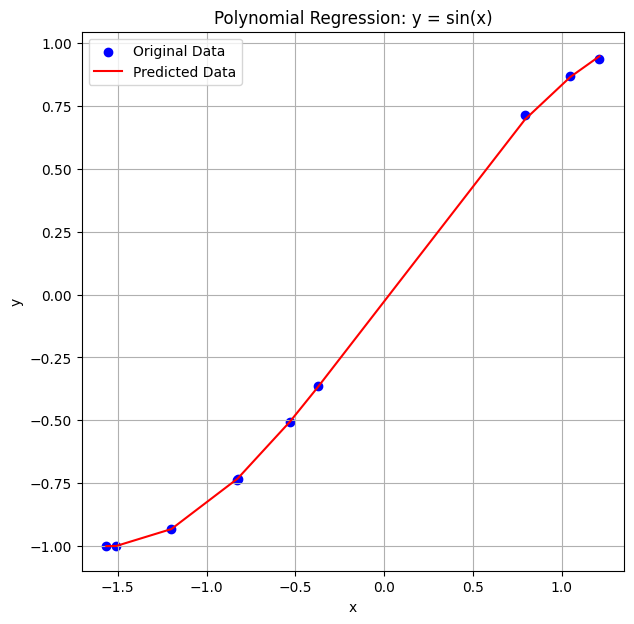

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
x=np.random.uniform(-math.pi/2,math.pi/2,10)
print(x)
y=np.zeros(np.size(x))
for i in range(np.size(y)):
  y[i]=math.sin(x[i])
print(y)

class PolynomialRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        β0 = self.parameters['β0']
        β1 = self.parameters['β1']
        β2 = self.parameters['β2']
        β3 = self.parameters['β3']
        predictions = β0 + β1 * train_input + β2 * train_input**2 + β3 * train_input**3
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (train_output - predictions) * -1
        dβ1 = np.mean(np.multiply(train_input, df))
        dβ2 = np.mean(np.multiply(train_input**2, df))
        dβ3 = np.mean(np.multiply(train_input**3, df))
        dβ0 = np.mean(df)
        derivatives['dβ0'] = dβ0
        derivatives['dβ1'] = dβ1
        derivatives['dβ2'] = dβ2
        derivatives['dβ3'] = dβ3
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['β0'] -= learning_rate * derivatives['dβ0']
        self.parameters['β1'] -= learning_rate * derivatives['dβ1']
        self.parameters['β2'] -= learning_rate * derivatives['dβ2']
        self.parameters['β3'] -= learning_rate * derivatives['dβ3']

    def train(self, train_input, train_output, learning_rate, iters):
        self.parameters['β0'] = np.random.uniform(0, 1)* -1
        self.parameters['β1'] = np.random.uniform(0, 1)* -1
        self.parameters['β2'] = np.random.uniform(0, 1)* -1
        self.parameters['β3'] = np.random.uniform(0, 1)* -1

        self.loss = []
        for i in range(iters):
            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_output)
            derivatives = self.backward_propagation(train_input, train_output, predictions)
            self.update_parameters(derivatives, learning_rate)
            self.loss.append(cost)
            if i % 1000 == 0:
                print("Iteration = {}, Loss = {}".format(i , cost))

        return self.parameters, self.loss

Polynomial_reg = PolynomialRegression()
loss_history = Polynomial_reg.train(x, y,0.001, 100000)
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]

plt.figure(figsize=(7, 7))
plt.scatter(x_sorted, y_sorted, color='blue', label='Original Data')
plt.plot(x_sorted,Polynomial_reg.forward_propagation(x_sorted), color='red', label='Predicted Data')
plt.title('Polynomial Regression: y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()





